# MNIST CLASSIFICATION WITH PYTORCH

In [1]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import dataset, DataLoader
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

## 1-) Configurations and parameters

In [2]:
# Device config
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyper parameters
input_size = 784
hidden_size = 100
num_classes = 10
N_EPOCHS = 2
batch_size = 100
learning_rate = 0.001

## 2-) Loading the Data

In [3]:
# Import
train_data = torchvision.datasets.MNIST(root="./data", train=True, 
                                        transform=transforms.ToTensor(), download=True)
print(train_data)

test_data = torchvision.datasets.MNIST(root="./data", train=False, 
                                        transform=transforms.ToTensor(), download=False)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
# Creating Data Batch
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, 
                          shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, 
                          shuffle=False)

torch.Size([100, 1, 28, 28])
torch.Size([100])


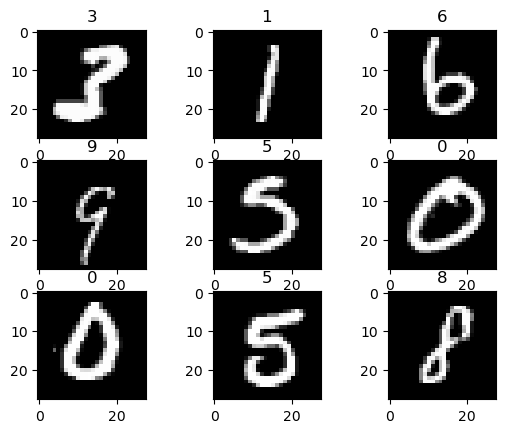

In [5]:
# Checking one example
for batch_X, batch_y in train_loader:
    print(batch_X.shape)
    print(batch_y.shape)
    
    for i in range(1,10):
        plt.subplot(3,3,i)
        plt.imshow(batch_X[i][0], cmap="gray")
        plt.title(f"{batch_y[i]}")
    break



## 3-) Model

In [6]:
# Creating a class 
class FeedFordwardNet(nn.Module):
    def __init__(self, input_size, hidden_size, ouput_size):
        super(FeedFordwardNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, ouput_size)
        
    def forward(self, x):
        output = self.linear1(x)
        output = self.relu(output)
        output = self.linear2(output)
        return output
    
def acc_score(y_pred, y):
    l = y_pred == y   
    return l.sum() / len(l)

def convert_to_class(y):
    m = nn.Softmax(dim=1)
    return torch.argmax(m(y), dim=1)

In [7]:
# Model
model = FeedFordwardNet(input_size=input_size, hidden_size=hidden_size, 
                        ouput_size=num_classes)
#summary(model, input_size=(1, 28, 28))
# Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


## 4-) Learning step

In [8]:
# Training Loop
N_batches = len(train_loader)

for epoch in range(N_EPOCHS):
    
    for i, (images, labels) in enumerate (train_loader):
        # Reshaping and set to the device( Gpu or cpu)
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward & loss
        y_hat = model(images)
        loss = criterion(y_hat, labels)
        
        # Backward & update
        optimizer.zero_grad()
        loss.backward(retain_graph = True)
        optimizer.step()
        
        
        if (i+1) % 100 == 0 :
            with torch.no_grad():
                acc_train = acc_score(convert_to_class(y_hat) , labels)
            
            print(f"epoch {epoch+1}/{N_EPOCHS}, step {i+100}/{N_batches} , acc_train = {acc_train.item():.3f}, loss = {loss.item():.3f}")
        
        
        
        

epoch 1/2, step 199/600 , acc_train = 0.910, loss = 0.332
epoch 1/2, step 299/600 , acc_train = 0.920, loss = 0.353
epoch 1/2, step 399/600 , acc_train = 0.890, loss = 0.429
epoch 1/2, step 499/600 , acc_train = 0.950, loss = 0.242
epoch 1/2, step 599/600 , acc_train = 0.940, loss = 0.216
epoch 1/2, step 699/600 , acc_train = 0.930, loss = 0.157
epoch 2/2, step 199/600 , acc_train = 0.980, loss = 0.128
epoch 2/2, step 299/600 , acc_train = 0.940, loss = 0.269
epoch 2/2, step 399/600 , acc_train = 0.960, loss = 0.142
epoch 2/2, step 499/600 , acc_train = 0.960, loss = 0.147
epoch 2/2, step 599/600 , acc_train = 0.980, loss = 0.105
epoch 2/2, step 699/600 , acc_train = 0.970, loss = 0.116


In [9]:
# Test
acc_test = 0.
with torch.no_grad():
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        labels = labels
        
        acc_test += acc_score(convert_to_class(model(images)), labels)
    acc_test /= len(test_loader)
        
print(f"The accuracy on the test is : {acc_test.item() : .3f}")     

The accuracy on the test is :  0.955
